In [1]:
import math

import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.stats import exponweib

data = [16, 94, 63, 267, 11, 250, 57, 39, 84, 16, 15, 77, 164, 106, 36,
        12, 116, 91, 48, 56, 74, 6, 8, 14, 32, 20, 23, 121, 34, 6, 156,
        27, 29, 3, 64, 45, 50, 22, 204, 60, 44, 28, 29, 206, 95, 74, 89,
        54, 85, 23, 129, 16, 120, 75, 17, 16, 57, 49, 14, 137]
variation_range = {}
for i in data:
    if i in variation_range:
        variation_range[i] += 1
    else:
        variation_range[i] = 1
sorted_variation_range = sorted(variation_range)
print("val\tfreq\trel_freq")
for i in sorted_variation_range:
    print(f'{i}\t{variation_range[i]}\t{round(variation_range[i] / len(data), 2)}')

val	freq	rel_freq
3	1	0.02
6	2	0.03
8	1	0.02
11	1	0.02
12	1	0.02
14	2	0.03
15	1	0.02
16	4	0.07
17	1	0.02
20	1	0.02
22	1	0.02
23	2	0.03
27	1	0.02
28	1	0.02
29	2	0.03
32	1	0.02
34	1	0.02
36	1	0.02
39	1	0.02
44	1	0.02
45	1	0.02
48	1	0.02
49	1	0.02
50	1	0.02
54	1	0.02
56	1	0.02
57	2	0.03
60	1	0.02
63	1	0.02
64	1	0.02
74	2	0.03
75	1	0.02
77	1	0.02
84	1	0.02
85	1	0.02
89	1	0.02
91	1	0.02
94	1	0.02
95	1	0.02
106	1	0.02
116	1	0.02
120	1	0.02
121	1	0.02
129	1	0.02
137	1	0.02
156	1	0.02
164	1	0.02
204	1	0.02
206	1	0.02
250	1	0.02
267	1	0.02


In [2]:
M = round(1 + math.log2(len(data)))
min_val = min(data)
max_val = max(data)
h = (max_val - min_val) / M
class_borders = {(min_val + h * i, min_val + h * (i + 1)): None for i in range(M)}
for border in class_borders:
    class_borders[border] = len([i for i in data if i < border[1] and i >= border[0]])
print("border\t\tfreq\trel_freq")
plot_values = []
sorted_borders = sorted(class_borders, key=lambda x: x[0])
for border in sorted_borders:
    plot_values.append((class_borders[border], class_borders[border] / len(data)))
    print(
        f"[{round(border[0], 1)}; {round(border[1], 1)})\t"
        f"{plot_values[-1][0]}\t{round(plot_values[-1][1], 2)}"
    )

border		freq	rel_freq
[3.0; 40.7)	26	0.43
[40.7; 78.4)	16	0.27
[78.4; 116.1)	8	0.13
[116.1; 153.9)	4	0.07
[153.9; 191.6)	2	0.03
[191.6; 229.3)	2	0.03
[229.3; 267.0)	1	0.02


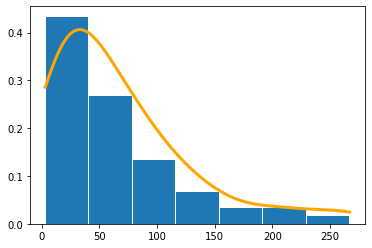

In [3]:
plt.bar([(i[0] + i[1]) / 2 for i in sorted_borders], [i[1] for i in plot_values], width=h-1)
def avg(data: list):
    return sum(data) / len(data)

mean = avg(data)
dispersion = sum((i - mean) ** 2 for i in data) / (len(data) - 1)
standard_deviation = dispersion ** 0.5
displaced_dispersion = sum((i - mean) ** 2 for i in data) / len(data)
displaced_standard_deviation = displaced_dispersion ** 0.5

def epanechnikov_kernel_function(u: float):
    return (3 / (4 * (5 ** 0.5))) * (1 - ((u ** 2) / 5)) * int((u ** 2) ** 0.5 <= (5 ** 0.5))
def gauss_kernel_function(u: float):
    return (1 / ((2 * math.pi) ** 0.5)) * math.exp(-(u ** 2) / 2)
def KDE(x, K, b):
    return sum(K((x - i) / b) for i in data) / (len(data) * b)

b_window = displaced_standard_deviation * (len(data) ** (-1/5))  # Scott
# b_window = displaced_standard_deviation * (((3 * len(data)) / 4) ** (-1/5))  # Silverman
x_grid = np.linspace(min_val, max_val, 150)
y_grid = [KDE(i, gauss_kernel_function, b_window) * 50 for i in x_grid]
plt.plot(x_grid, y_grid, color="orange", linewidth=3)

In [4]:
sorted_data = sorted(data)
N = len(data)
median = avg(sorted_data[(len(data) // 2) - (not bool(len(data) % 2)) : (len(data) // 2) + 1])
variation = standard_deviation / mean
displaced_skewness = sum(((i - mean) ** 3) for i in data) /\
    (len(data) * (displaced_standard_deviation ** 3))
skewness = ((N * (N - 1)) / (N - 2)) * displaced_skewness
displaced_kurtosis = sum(((i - mean) ** 4) for i in data) /\
    (len(data) * (displaced_standard_deviation ** 4)) - 3
displaced_antikurtosis = (displaced_kurtosis + 3) ** -0.5
kurtosis = (((N ** 2) - 1) / ((N - 2) * (N - 3))) * (displaced_kurtosis + 6 / (N + 1))

print("Count =", N)
print("Mean =", mean)
print("Median =", median)
print("Dispersion =", dispersion)
print("Standard_deviation =", standard_deviation)
print("Displaced dispersion =", displaced_dispersion)
print("Displaced standard deviation =", displaced_standard_deviation)
print("Coefficient of variation =", variation)
print("Displaced coefficient of skewness =", displaced_skewness)
print("Coefficient of skewness =", skewness)
print("Displaced coefficient of kurtosis =", displaced_kurtosis)
print("Coefficient of kurtosis =", kurtosis)
print("Displaced coefficient of antikurtosis =", displaced_antikurtosis)


Count = 60
Mean = 66.21666666666667
Median = 49.5
Dispersion = 3624.4437853107343
Standard_deviation = 60.203353605183274
Displaced dispersion = 3564.0363888888887
Displaced standard deviation = 59.699550994030844
Coefficient of variation = 0.909187318477472
Displaced coefficient of skewness = 1.5287605638219866
Coefficient of skewness = 93.30711027465229
Displaced coefficient of kurtosis = 2.09947667036515
Coefficient of kurtosis = 2.39262448174355
Displaced coefficient of antikurtosis = 0.44283016356349697


In [5]:
t_distribution_quantile = 2

def get_confidence_interval(characteristic, std_deviation) -> tuple:
    return characteristic - t_distribution_quantile * std_deviation,\
        characteristic + t_distribution_quantile * std_deviation

std_dev_of_mean = standard_deviation / (N ** 0.5)
std_dev_of_std_dev = standard_deviation / ((2 * len(data)) ** 0.5)
std_dev_of_variation = variation * (((1 + 2 * (variation ** 2)) / (2 * N)) ** 0.5)
std_dev_of_displaced_skewness = ((6 * (N - 2)) / ((N + 1) * (N + 3))) ** 0.5
std_dev_of_skewness = ((6 * N * (N - 1)) / ((N - 2) * (N + 1) * (N + 3))) ** 0.5
std_dev_of_displaced_kurtosis = (((24 * N) * (N - 2) * (N - 3)) /\
                                 (((N + 1) ** 2) * (N + 3) * (N + 5))) ** 0.5
std_dev_of_kurtosis = (((24 * N) * ((N - 1) ** 2)) /\
                       ((N - 3) * (N - 2) * (N + 3) * (N + 5))) ** 0.5

mean_interval = get_confidence_interval(mean, std_dev_of_mean)
std_dev_interval = get_confidence_interval(
    standard_deviation, std_dev_of_std_dev
)
variation_interval = get_confidence_interval(variation, std_dev_of_variation)
displaced_skewness_interval = get_confidence_interval(
    displaced_skewness, std_dev_of_displaced_skewness
)
skewness_interval = get_confidence_interval(skewness, std_dev_of_skewness)
displaced_kurtosis_interval = get_confidence_interval(
    displaced_kurtosis, std_dev_of_displaced_kurtosis
)
kurtosis_interval = get_confidence_interval(kurtosis, std_dev_of_kurtosis)

print("Standard deviation of mean =", std_dev_of_mean)
print("Standard deviation of standard deviation =", std_dev_of_std_dev)
print("Standard deviation of variation =", std_dev_of_variation)
print("Standard deviation of displaced skewness =", std_dev_of_displaced_skewness)
print("Standard deviation of skewness =", std_dev_of_skewness)
print("Standard deviation of displaced kurtosis =", std_dev_of_displaced_kurtosis)
print("Standard deviation of kurtosis =", std_dev_of_kurtosis)
print()
print(f"Mean confidence interval = [{mean_interval[0]}; {mean_interval[1]}]")
print(f"Standard deviation confidence interval = [{std_dev_interval[0]}; {std_dev_interval[1]}]")
print(f"Variation confidence interval = [{variation_interval[0]}; {variation_interval[1]}]")
print(f"Displaced skewness confidence interval = [{displaced_skewness_interval[0]};"
      f" {displaced_skewness_interval[1]}]")
print(f"Skewness confidence interval = [{skewness_interval[0]}; {skewness_interval[1]}]")
print(f"Displaced kurtosis confidence interval = [{displaced_kurtosis_interval[0]};"
      f" {displaced_kurtosis_interval[1]}]")
print(f"Kurtosis confidence interval = [{kurtosis_interval[0]}; {kurtosis_interval[1]}]")

Standard deviation of mean = 7.772219529957035
Standard deviation of standard deviation = 5.49578913450314
Standard deviation of variation = 0.1351920872126341
Standard deviation of displaced skewness = 0.30092233963047793
Standard deviation of skewness = 0.3086939139148819
Standard deviation of displaced kurtosis = 0.5589537608654785
Standard deviation of kurtosis = 0.6084920100891885

Mean confidence interval = [50.6722276067526; 81.76110572658074]
Standard deviation confidence interval = [49.21177533617699; 71.19493187418955]
Variation confidence interval = [0.6388031440522038; 1.17957149290274]
Displaced skewness confidence interval = [0.9269158845610307; 2.1306052430829423]
Skewness confidence interval = [92.68972244682253; 93.92449810248205]
Displaced kurtosis confidence interval = [0.9815691486341931; 3.217384192096107]
Kurtosis confidence interval = [1.175640461565173; 3.609608501921927]


In [6]:
def empirical_distribution_function(index: int, var_range: dict, sorted_var_range: list):
    return round(sum(var_range[i] / len(data) for i in sorted_var_range[:index + 1]), 12)

distribution_function_values = [
    empirical_distribution_function(i, variation_range, sorted_variation_range) \
    for i in range(len(variation_range))
]
del distribution_function_values[-1]
print(distribution_function_values)

[0.016666666667, 0.05, 0.066666666667, 0.083333333333, 0.1, 0.133333333333, 0.15, 0.216666666667, 0.233333333333, 0.25, 0.266666666667, 0.3, 0.316666666667, 0.333333333333, 0.366666666667, 0.383333333333, 0.4, 0.416666666667, 0.433333333333, 0.45, 0.466666666667, 0.483333333333, 0.5, 0.516666666667, 0.533333333333, 0.55, 0.583333333333, 0.6, 0.616666666667, 0.633333333333, 0.666666666667, 0.683333333333, 0.7, 0.716666666667, 0.733333333333, 0.75, 0.766666666667, 0.783333333333, 0.8, 0.816666666667, 0.833333333333, 0.85, 0.866666666667, 0.883333333333, 0.9, 0.916666666667, 0.933333333333, 0.95, 0.966666666667, 0.983333333333]


In [7]:
def get_quantile_value(p) -> float:
    c0 = 2.515517
    c1 = 0.802853
    c2 = 0.010328
    d1 = 1.432788
    d2 = 0.1892659
    d3 = 0.001308
    def fi(a) -> float:
        t = (-2 * math.log(a)) ** 0.5
        return t - (
            (c0 + (c1 * t) + (c2 * (t ** 2))) / \
            (1 + (d1 * t) + (d2 * (t ** 2)) + (d3 * (t ** 3)))
        )
    return -fi(p) if p <= 0.5 else fi(1 - p)

quantiles = [get_quantile_value(p) for p in distribution_function_values]
print(quantiles)

[-2.128485364734459, -1.6452088067116766, -1.5013826098846976, -1.3832300654773464, -1.281726268647897, -1.1108256862298187, -1.0364291126867813, -0.7832847956961102, -0.7276522384271132, -0.6741869654261609, -0.6225854045922437, -0.5239997878980465, -0.4766180042942938, -0.4302897369601826, -0.34024982739009535, -0.2963023574262853, -0.25293136685424344, -0.21004384547588661, -0.16755346149063, -0.1253791842194576, -0.0834440955622191, -0.04167434153414207, 1.815371634128482e-06, 0.04167434153414207, 0.0834440955622191, 0.1253791842194576, 0.2100438454758864, 0.25293136685424344, 0.2963023574262853, 0.34024982739009535, 0.4302897369601828, 0.4766180042942938, 0.5239997878980465, 0.5725943978337698, 0.6225854045922437, 0.6741869654261609, 0.7276522384271132, 0.7832847956961102, 0.8414544471516716, 0.9026197296543831, 0.9673607925084813, 1.0364291126867808, 1.1108256862298187, 1.1919300520587144, 1.281726268647897, 1.3832300654773464, 1.501382609884697, 1.645208806711676, 1.834322165281

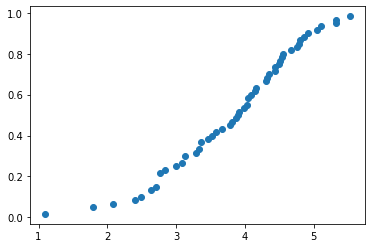

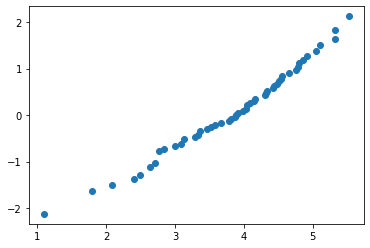

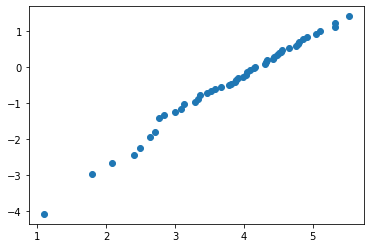

In [8]:
t_axis = [math.log(i) for i in sorted_variation_range[:-1]]
z_axis = [math.log(math.log(1 / (1 - i))) for i in distribution_function_values]
plt.scatter(t_axis, distribution_function_values)
plt.figure()
plt.scatter(t_axis, quantiles)
plt.figure()
plt.scatter(t_axis, z_axis)